# Emergency Department Data Analysis

In [2]:
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv('EmergencyDepartmentData.csv')
df.head()

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Depart Status Code,Departure Status Desc.,Depart. Dest. Code,Depart. Dest. Desc.,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code,Presenting Complaint Desc.,Diag Code,Diagnosis Desc.
0,67269,63190,3,15,01-01-09,01/01/09,01/01/09,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,733,619.0,4000.0,DRUG / ALCOHOL / POISONING,F43.9,EMOTIONAL CRISIS
1,444991,63193,4,15,01-01-09,01/01/09,01/01/09,W,DID NOT WAIT,DNW,* DID NOT WAIT,420,274.0,9000.0,INJURY,Z53.2,DID NOT WAIT
2,444992,63194,4,8,01-01-09,01/01/09,01/01/09,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,13,0.0,7000.0,EYE,H10.9,CONJUNCTIVITIS
3,444999,63213,3,12,01-01-09,01/01/09,01/01/09,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,98,26.0,25000.0,PAIN,H60.9,OTITIS EXTERNA
4,429921,63217,4,15,01-01-09,01/01/09,01/01/09,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,274,119.0,9000.0,INJURY,S83.6,KNEE SPRAIN / STRAIN


## Data Exploration

Let's have a look at the average time at the hospital based on the type of complaint that the patient had. This is from the time they first arrived at the hospital to when they left.

In [4]:
avg_time_hosp = df.groupby('Presenting Complaint Desc.')['TimeDiff Arrival-Actual Depart (mins)'].mean().reset_index()


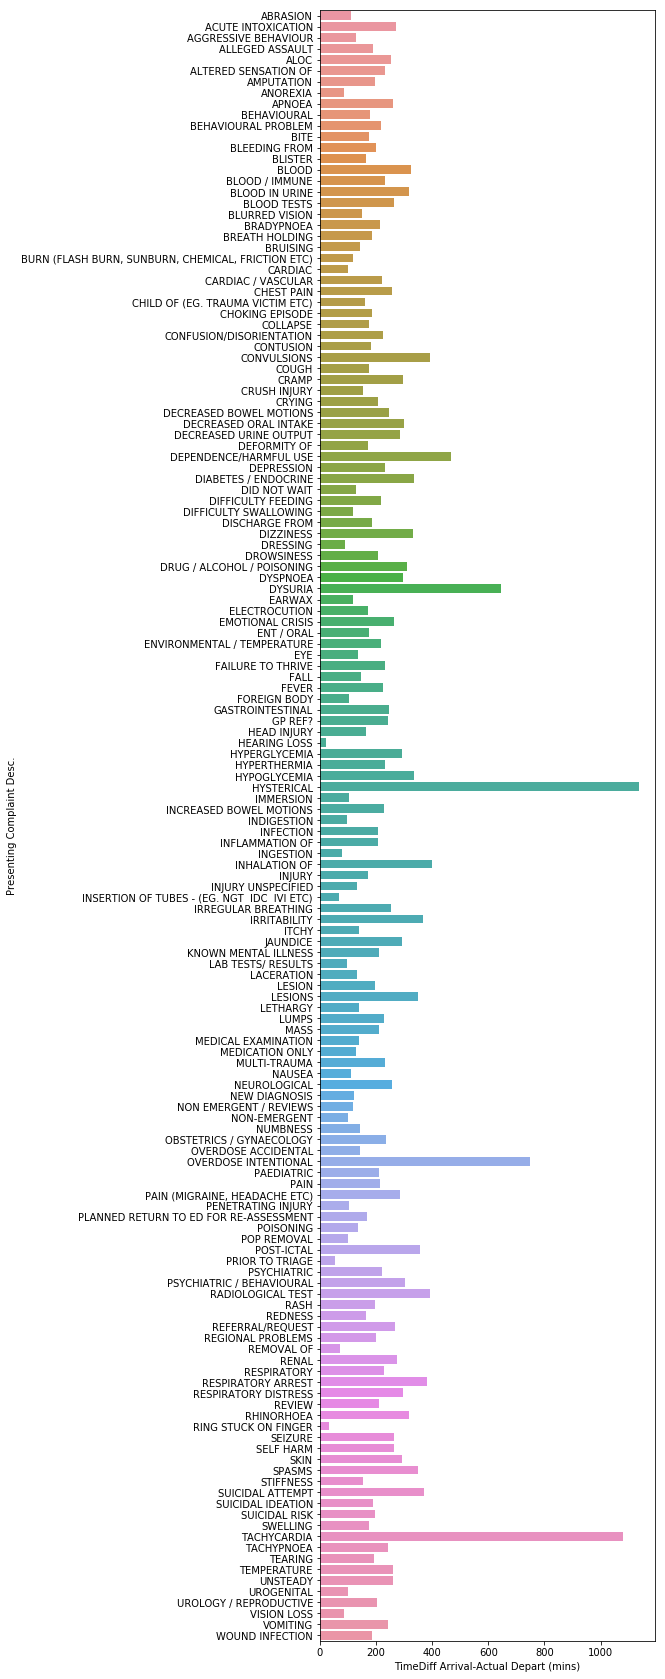

In [5]:
import matplotlib.pyplot as plt
ax = plt.subplots(figsize=(6, 30))
ax = sns.barplot(x = avg_time_hosp['TimeDiff Arrival-Actual Depart (mins)'] , y = avg_time_hosp['Presenting Complaint Desc.'])



We can see from the above chart, patients complaining about dysuria, hysterical, intentional overdose and tachycardia spent the most time in the hospital. This could be helpful in predicting a patient's stay at the hospital based on their complaint. We can also see that hearing loss and ring stuck on a finger requires the shortest stays.

Next, let's take a look at their hospital stay time based on their diagnosis

In [6]:
avg_time_diag = df.groupby('Diagnosis Desc.')['TimeDiff Arrival-Actual Depart (mins)'].mean().reset_index()

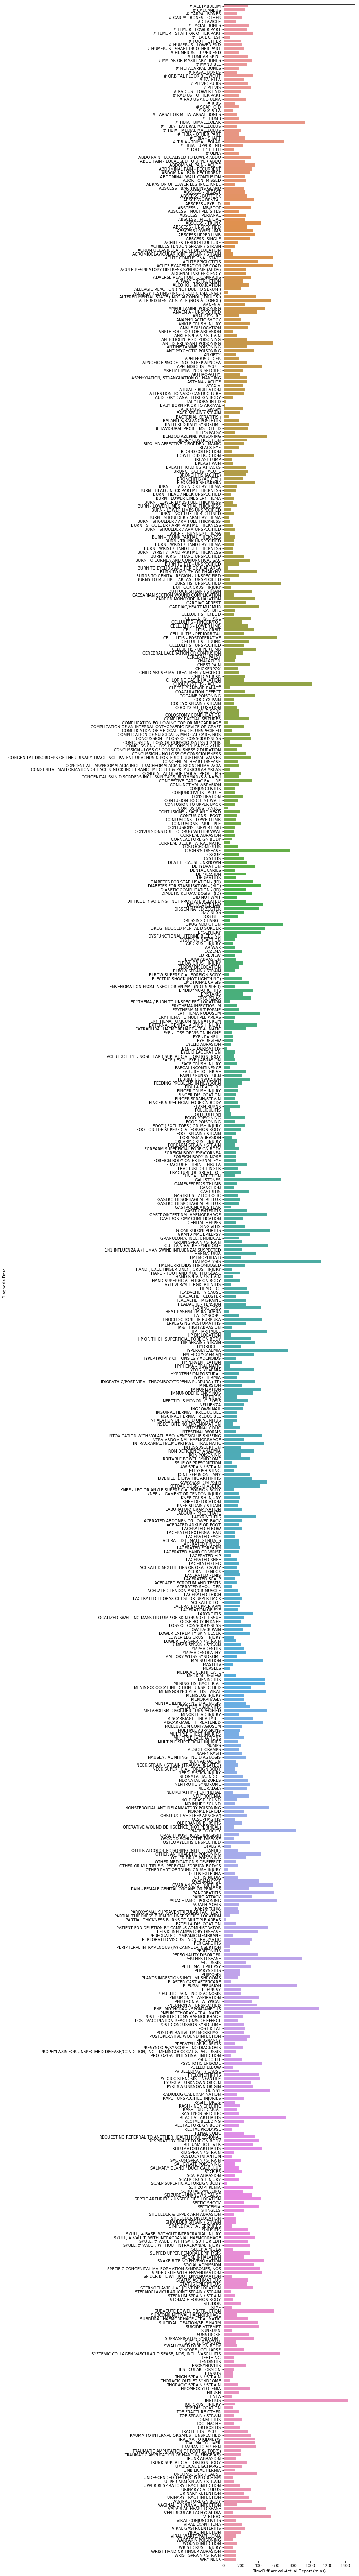

In [7]:
ax = plt.subplots(figsize=(6, 120))
ax = sns.barplot(x = avg_time_diag['TimeDiff Arrival-Actual Depart (mins)'] , y = avg_time_diag['Diagnosis Desc.'])


We can see from the above chart that tibia-bimalleolar, cholecystitis-acute, haemoptysis, pneumothorax and tinnitus are some of the diagnoses that takes the longest hospital stays. Scalp Superficial Foreign Body and partial thickness burns area requires the shortest stays.

Wait times at the emergency is a pressing issue. Let's have a look at their initial priority assesment versus how much time they have spent waiting.

In [8]:
df['wait_times'] = df['TimeDiff Arrival-Actual Depart (mins)'] - df['TimeDiff TreatDrNr-Act. Depart (mins)']
avg_wait_time = df.groupby('Triage Priority')['wait_times'].mean().reset_index()

In [9]:
avg_wait_time

,Triage Priority,wait_times
0,1,0.585657
1,2,11.154380
2,3,57.348925
3,4,83.396025
4,5,65.075540


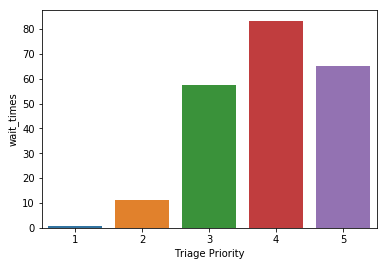

In [10]:
#ax = plt.subplots(figsize=(6, 80))
ax = sns.barplot(x = avg_wait_time['Triage Priority'] , y = avg_wait_time['wait_times'])

Triage Priority 4 has significantly higher wait times than priority 5. This shows that the priority assessment system needs to be reevaluated.

Let's also look at the patients' departure destination. 

In [11]:
dep_dest_count = df['Depart. Dest. Desc.'].value_counts()

In [12]:
dep_dest_count.divide(dep_dest_count.sum())*100

* DISCHARGED                              75.672453
2F - PAEDIATRICS                          10.431297
DID NOT WAIT                               7.864052
* DID NOT WAIT                             2.865377
TRANSFERRED TO ANOTHER HEALTH FACILITY     1.384656
* LEFT AGAINST MEDICAL ADVICE              0.639327
2A - MENTAL HEALTH                         0.414072
* CHOOSING TO ATTEND FMC (DNW)             0.152378
OTHER                                      0.096065
2I - ORTHOPEDICS                           0.092752
* DISCHARGE LIKELY                         0.089440
2H - SURGICAL WARD                         0.062939
* DID NOT WAIT PRIOR TO TRIAGE             0.053001
THEATRE SUITE                              0.036438
* ADMISSION LIKELY                         0.023188
DIED IN ED                                 0.019875
2G - MEDICAL WARD                          0.016563
INTENSIVE CARE UNIT                        0.016563
BIRTH SUITE                                0.016563
3A - MEDICAL

We can see that 75% of the patients are discharged directly from the emergency and approximately 10 % of the patients did not wait at the emergency.


Age distribution of patients

In [13]:
age_count = df[' Age  (yrs)'].value_counts()

In [14]:
age_count.divide(age_count.sum())*100

0     15.446535
1     13.816748
2      9.970849
3      7.284351
15     6.128263
14     5.581688
4      5.502186
13     4.766795
5      4.587916
12     4.299722
11     3.955214
6      3.955214
10     3.872400
9      3.782960
8      3.551080
7      3.498079
Name:  Age  (yrs), dtype: float64

All the patients in this dataset are under the age of 18. And approximately 44 % of the patients are under the age of 3.

Let's look at the most common diagnoses at different ages

In [15]:

diag_grps = df.pivot_table(index=["Diagnosis Desc."], columns=[" Age  (yrs)"], aggfunc=len)
diag_grps


Arrival Date                       \
 Age  (yrs)                                         0      1      2      3    
Diagnosis Desc.                                                               
# ACETABULUM                                       NaN    NaN    NaN    NaN   
# CALCANEUS                                        NaN    NaN    NaN    NaN   
# CARPAL BONES                                     NaN    NaN    NaN    NaN   
# CARPAL BONES - OTHER                             NaN    1.0    NaN    NaN   
# CLAVICLE                                         2.0   10.0   15.0   11.0   
# FACIAL BONES                                     NaN    NaN    NaN    NaN   
# FEMUR - LOWER PART                               1.0    NaN    1.0    NaN   
# FEMUR - SHAFT OR OTHER PART                      2.0    NaN    3.0    NaN   
# FLAIL CHEST                                      NaN    NaN    1.0    NaN   
# FOOT - OTHER                                     NaN    NaN    1.0    1.0   
# HUMERUS - LOWER END                              2.0   17.0   28.0   20.0   
# HUMERUS - SHAFT OR OTHER PART                    1.0    NaN    NaN    NaN   
# HUMERUS - UPPER END                              1.0    NaN    NaN    3.0   
# LUMBAR SPINE                                     NaN    NaN    NaN    NaN   
# MALAR OR MAXILLARY BONES                         NaN    NaN    NaN    1.0   
# MANDIBLE                                         NaN    1.0    NaN    NaN   
# METACARPAL BONES                                 NaN    1.0    2.0    NaN   
# NASAL BONES                                      NaN    4.0    1.0    3.0   
# ORBITAL FLOOR BLOWOUT                            NaN    NaN    NaN    NaN   
# PATELLA                                          NaN    NaN    NaN    NaN   
# PELVIC PUBIS                                     NaN    NaN    NaN    NaN   
# PELVIS                                           NaN    NaN    NaN    NaN   
# RADIUS - LOWER END                               NaN    4.0   13.0    9.0   
# RADIUS - OTHER PART                              NaN    1.0    3.0    8.0   
# RADIUS AND ULNA                                  1.0   17.0   19.0   16.0   
# RIBS                                             NaN    NaN    NaN    NaN   
# SCAPHOID                                         NaN    NaN    NaN    NaN   
# SCAPULA                                          NaN    NaN    NaN    NaN   
# TARSAL OR METATARSAL BONES                       NaN    3.0    2.0    1.0   
# THUMB                                            NaN    1.0    NaN    1.0   
...                                                ...    ...    ...    ...   
TRAUMA TO SPLEEN                                   NaN    NaN    NaN    NaN   
TRAUMATIC AMPUTATION OF FOOT &/ TOE(S)             NaN    NaN    1.0    NaN   
TRAUMATIC AMPUTATION OF HAND &/ FINGER(S)          1.0    NaN    NaN    3.0   
TRUNK ABRASION                                     NaN    NaN    NaN    3.0   
TRUNK SUPERFICIAL FOREIGN BODY                     NaN    NaN    NaN    NaN   
UMBILICAL DISCHARGE                               17.0    NaN    NaN    NaN   
UMBILICAL HERNIA                                   7.0    NaN    NaN    1.0   
UNCONSCIOUS ? CAUSE                                1.0    NaN    NaN    NaN   
UNDESCENDED TESTIS/CRYPTORCHISM                    NaN    NaN    1.0    NaN   
UPPER ARM SPRAIN / STRAIN                          1.0    4.0    3.0    1.0   
UPPER RESPIRATORY TRACT INFECTION                524.0  451.0  231.0  143.0   
URINARY CALCULUS                                   NaN    NaN    NaN    NaN   
URINARY RETENTION                                  NaN    NaN    3.0    NaN   
URINARY TRACT INFECTION                           56.0   28.0   23.0   20.0   
VAGINAL FOREIGN BODY                               NaN    NaN    NaN    NaN   
VAGINAL OR VULVAL INFECTION                        NaN    1.0    2.0    1.0   
VALVULAR HEART DISEASE                             NaN    NaN    NaN    NaN   
VENTRICULAR T

This matrix shows the number of patients of a specific age who are diagnosed with a particular disease.

In [16]:
diag_age = df.groupby('Diagnosis Desc.')[' Age  (yrs)'].count().reset_index()
diag_age

,Diagnosis Desc.,Age (yrs)
0,# ACETABULUM,1
1,# CALCANEUS,3
2,# CARPAL BONES,2
3,# CARPAL BONES - OTHER,18
4,# CLAVICLE,199
5,# FACIAL BONES,5
6,# FEMUR - LOWER PART,6
7,# FEMUR - SHAFT OR OTHER PART,13
8,# FLAIL CHEST,1
9,# FOOT - OTHER,35


We can see from above that most common diagnoses are clavicle, humerus-lower end, metacarpal bones, radius, upper respiratory tract infection, urinary tract infection, viral gastroenteritis, viral infection and wrist sprain.

## Predictive Models

Predict wait times. 

We will use linear regression for the prediction. All unnecessary features have been removed like the identification numbers, and diagnosis data as it would not have direct impact on the wait times because it happens after the wait.

Remove unnecessary features and assign the X which would be the training features and Y which would the output label.

In [17]:
select_features = ['Triage Priority', ' Age  (yrs)', 'Presenting Complaint Code']
X = df[select_features]
Y = df['wait_times']

 

Checking to see if any values in X is empty

In [18]:
X.isnull().any()

Triage Priority              False
 Age  (yrs)                  False
Presenting Complaint Code     True
dtype: bool

Replace them with 0

In [19]:
X.fillna(0, inplace=True)


C:\Users\arpit\Anaconda2\envs\py36new\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Checking to see if any values in Y is empty

In [20]:
Y.isnull().any()

True

Replace them with 0

In [21]:
Y.fillna(0, inplace=True)

Split data for training and testing. 80% will be used for training and 20% for testing.

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20)

C:\Users\arpit\Anaconda2\envs\py36new\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Import linear regression and train the model.

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predict using the model

In [24]:
y_pred = lr.predict(X_test)

Calculate the root mean squared error of the testing data to evaluate the model.

In [25]:
import numpy as np
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

68.49117669040544


Also check the root mean squared error of training data

In [26]:
y_pred_train = lr.predict(X_train)

In [27]:
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

68.10365701230923


Both the training and testing RMSE are close to each other. This shows that there is minimal overfitting.

Print the coefficients and intercept of the model

In [28]:
lr.coef_

array([ 2.38368591e+01,  2.43421029e-01, -4.96794396e-05])

In [29]:
lr.intercept_

-17.147781818513067

Predict Diagnosis using classification techniques.k-nn classifier is used. 

Select appropriate features

In [31]:
select_features = ['Triage Priority', ' Age  (yrs)', 'Presenting Complaint Code']
X = df[select_features]
Y = df['Diagnosis Desc.']

Fill empty cells 

In [32]:
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

C:\Users\arpit\Anaconda2\envs\py36new\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Split data into training and testing

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20)


Use knn classifier with 500 neighbors and the points are weighted by the inverse of their distance

In [34]:
from sklearn.neighbors import KNeighborsClassifier
nb = KNeighborsClassifier(n_neighbors=500,weights='distance')
nb.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=500, p=2,
           weights='distance')

In [35]:
y_pred = nb.predict(X_test)
print (y_pred)

['VIRAL GASTROENTERITIS' 'DID NOT WAIT' 'DID NOT WAIT' ... 'DID NOT WAIT'
 'UPPER RESPIRATORY TRACT INFECTION' 'DID NOT WAIT']


In [36]:
from sklearn.metrics import classification_report
print ("Classification report: \n", (classification_report(y_test, y_pred)))

Classification report: 
                                                                  precision    recall  f1-score   support

                                                   # ACETABULUM       0.00      0.00      0.00         1
                                                 # CARPAL BONES       0.00      0.00      0.00         1
                                         # CARPAL BONES - OTHER       0.00      0.00      0.00         1
                                                     # CLAVICLE       0.02      0.03      0.02        34
                                                 # FACIAL BONES       0.00      0.00      0.00         1
                                           # FEMUR - LOWER PART       0.00      0.00      0.00         0
                                  # FEMUR - SHAFT OR OTHER PART       0.00      0.00      0.00         2
                                                 # FOOT - OTHER       0.00      0.00      0.00         8
                             

C:\Users\arpit\Anaconda2\envs\py36new\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\arpit\Anaconda2\envs\py36new\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


This classification report shows the precision, recall, F1 score and support (count) of each of the classes. Since, it has a large number of classes the scores are not very high. Other classification models need to be tried to see if the scores can be improved. 

Predict triage priority number based on age and complaint

In [38]:
select_features = [' Age  (yrs)', 'Presenting Complaint Code']
X = df[select_features]
Y = df['Triage Priority']

In [40]:
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

C:\Users\arpit\Anaconda2\envs\py36new\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20)

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [52]:
y_pred = clf.predict(X_test)

In [53]:
from sklearn.metrics import classification_report
print ("Classification report: \n", (classification_report(y_test, y_pred)))

Classification report: 
              precision    recall  f1-score   support

          1       0.67      0.08      0.14        50
          2       0.32      0.03      0.05       451
          3       0.68      0.82      0.75      3561
          4       0.52      0.45      0.48      1746
          5       0.63      0.49      0.55       230

avg / total       0.61      0.64      0.61      6038



The F1 score is 0.61 for predicting triage priority based on the age and complaint using Random Forest. 